# Unsupervised learning

## Customer segmentation - Clustering




**Цель:** На основании данных о покупателях супермаркета выделить целевые группы, для которых можно проводить определенные маркетиновые мероприятия.

- **Customer ID** - уникальный ID покупателя
- **age** - возраст покупателя (полных лет)
- **gender** - пол покупателя
- **annual income** - годовой доход покупателя
- **spending score** - сумма расходов на попупки

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
customers = pd.read_csv('Mall_Customers.csv')

In [4]:
customers.shape

(200, 5)

In [5]:
customers.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
# проверка на наличие пропущенных значений

customers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [14]:
# исключение колонки CustomerID, т.к. не несет полезной для анализа информации

customers.drop('CustomerID', axis =1 , inplace=True)

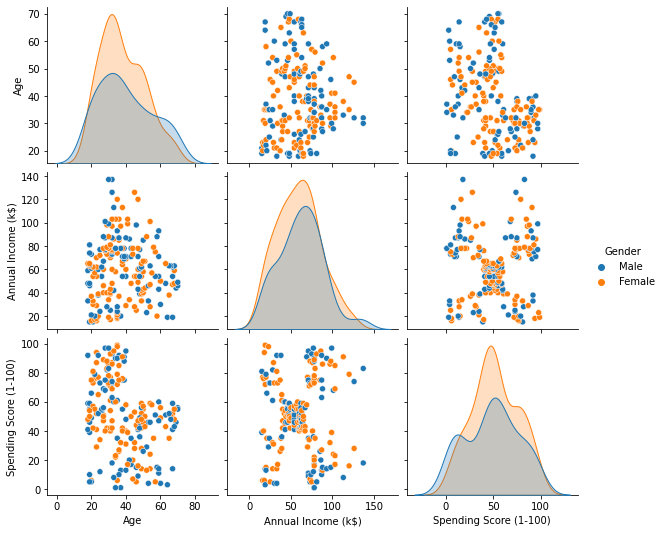

In [15]:
sns.pairplot(customers, hue = 'Gender', aspect = 1.1)

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

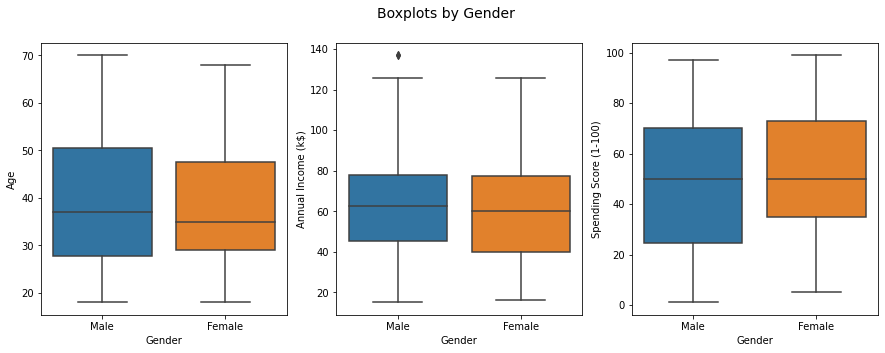

In [16]:
fig, axes = plt.subplots(1, 3, figsize = (15,5))
fig.suptitle('Boxplots by Gender', fontsize = 14)

sns.boxplot(data = customers, x = 'Gender', y = 'Age', ax = axes[0])
sns.boxplot(data = customers, x = 'Gender', y = 'Annual Income (k$)', ax = axes[1])
sns.boxplot(data = customers, x = 'Gender', y = 'Spending Score (1-100)', ax = axes[2])

Количество потраченных денег мужчинами и женщинами не настолько кардинально отличается, чтобы формировать кластеры по полу.

### PCA

#### Сведение многомерных данных к размерности 2, чтобы визуализировать и проверить на возможные интересные закономерности

In [24]:
# Замена данных в колонке Gender числами

customers['Gender'].replace('Male', 1, inplace=True)
customers['Gender'].replace('Female', 0, inplace=True)

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [26]:
scaled_customers = StandardScaler().fit_transform(customers)

In [27]:
model = PCA(n_components=2)
new_customers = model.fit_transform(scaled_customers)

In [28]:
model.n_components_

2

In [30]:
model.explained_variance_ratio_

array([0.33690046, 0.26230645])

In [31]:
df = pd.DataFrame(new_customers, columns=['Col 1', 'Col 2'])

In [32]:
x_ax = df['Col 1']
y_ax = df['Col 2']

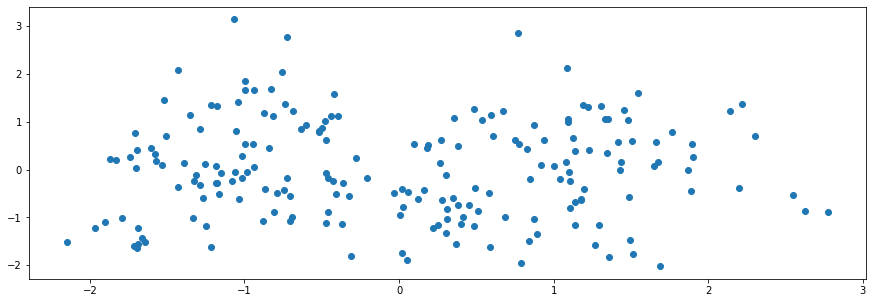

In [102]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot()

plt.scatter(df['Col 1'], df['Col 2'])

В результате сведения всех колонок к 2 случилась потеря 40% данных, но визуализация показывает, что в данных есть закономерность и несколько кластеров можно выделить.

In [35]:
# Подбор оптимального количества фич

explained_variance = []

for i in range(1,5):
    pca_model = PCA(n_components = i)
    pca_model.fit(scaled_customers)
    
    explained_variance.append(np.sum(pca_model.explained_variance_ratio_))

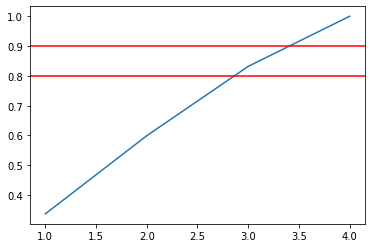

In [37]:
plt.plot(range(1, 5), explained_variance)

plt.axhline(0.9, c='r')
plt.axhline(0.8, c='r')

In [ ]:
Оптимальное количество коvпонент - 3, описывают данные на 83% процента.

In [47]:
pca_model = PCA(n_components = 3)
new_customers = pca_model.fit_transform(scaled_customers)

In [50]:
pca_customers = pd.DataFrame(new_customers)

In [51]:
pca_customers_scal = StandardScaler().fit_transform(pca_customers)

In [ ]:
# Определение оптимального количества кластеров данных

In [52]:
qnt_clast = []

for i in range(2, 10):
    model = KMeans(n_clusters = i)
    model.fit(pca_customers_scal)
    
    qnt_clast.append(model.inertia_)


Text(0, 0.5, 'inertia - Сумма квадратов расстояний')

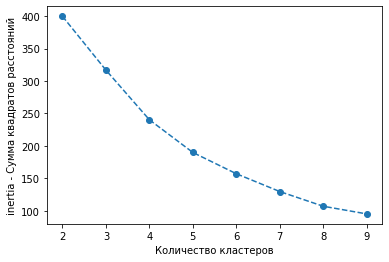

In [54]:
plt.plot(range(2, 10), qnt_clast, 'o--')

plt.xlabel('Количество кластеров')
plt.ylabel('inertia - Сумма квадратов расстояний')

Оптимальное количество кластеров - 5

### Построение модели KMeans

In [55]:
# создание модели на 5 клстеров, использую алгорим KMeans

pca_cust_model = KMeans(n_clusters = 5)

In [57]:
# обучение модели

pca_cust_model.fit(pca_customers_scal)

KMeans(n_clusters=5)

In [58]:
pca_cust_labels = pca_cust_model.labels_

In [65]:
# в нестандартизованный датасет после PCA добавляем метки кластеров

pca_customers['labels'] = pca_cust_labels
pca_customers_centroids = pca_cust_model.cluster_centers_

In [66]:
pca_customers_centroids

array([[-0.71387276,  0.78784467, -1.13939625],
       [ 0.59606086, -0.8706303 ,  0.68092454],
       [ 1.17042296,  0.53733452, -0.64827421],
       [-0.71434834,  0.5152453 ,  1.198971  ],
       [-0.95053827, -1.07539587, -0.08385274]])

Text(0.5, 1.05, 'Customers Clusters')

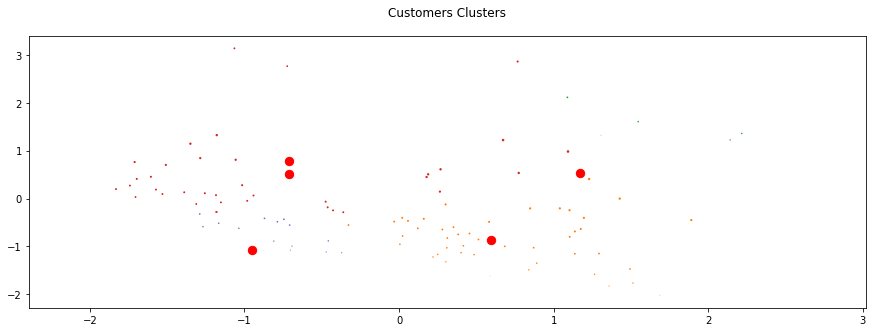

In [111]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot()

for i in range(0, 5):
    
    ax.scatter(pca_customers[pca_cust_labels == i][0], pca_customers[pca_customers['labels'] == i][1], pca_customers[pca_customers['labels'] == i][2])
    
plt.scatter(pca_customers_centroids[:, 0], pca_customers_centroids[:, 1], s=70, c = 'red')
    
plt.title('Customers Clusters', y = 1.05)

In [ ]:
x = pca_customers[]

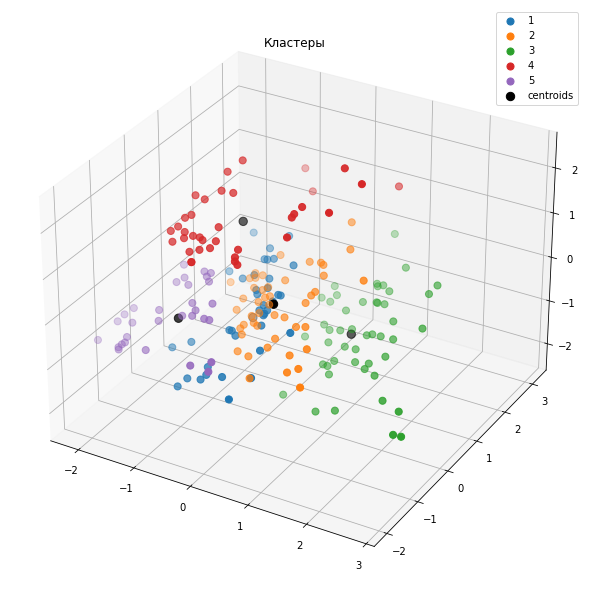

In [113]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,8))
ax = Axes3D(fig)

for i in range(0, 5):
    
    ax.scatter(pca_customers[pca_cust_labels == i][0],
               pca_customers[pca_cust_labels == i][1],
               pca_customers[pca_cust_labels == i][2],
               label = i+1, s = 50)
    
ax.scatter(pca_customers_centroids[:,0], pca_customers_centroids[:,1], pca_customers_centroids[:,2], s = 70, c = '0', label = 'centroids')

plt.title('Кластеры', y = 1)
plt.legend()

Полученные данные показывают, что сегментирование возможно, но на их основе разработать рекламную стратегию не получится, без дополнительного анализа каждого из кластеров.

Выберем другой путь - разделим покупателей на кластеры в зависимости от годового дохода и расходов.

In [115]:
customers

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [116]:
X = customers[['Annual Income (k$)', 'Spending Score (1-100)']]

In [119]:
X_sc = StandardScaler().fit_transform(X)

In [120]:
qnt_cl = []

for i in range(2, 10):
    
    model = KMeans(n_clusters=i)
    model.fit(X_sc)
    
    qnt_cl.append(model.inertia_)

Text(0, 0.5, 'Inertia')

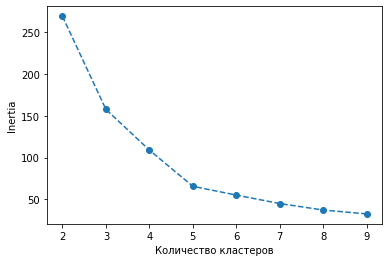

In [122]:
plt.plot(range(2,10), qnt_cl, 'o--')
plt.xlabel('Количество кластеров')
plt.ylabel('Inertia')

Оптимальное количество кластеров - 5

In [132]:
X_model = KMeans(n_clusters = 5)

In [142]:
X_model.fit(X_sc) 

KMeans(n_clusters=5)

In [143]:
X_labels = X_model.labels_
X_centroids = X_model.cluster_centers_

In [144]:
X['Labels'] = X_labels

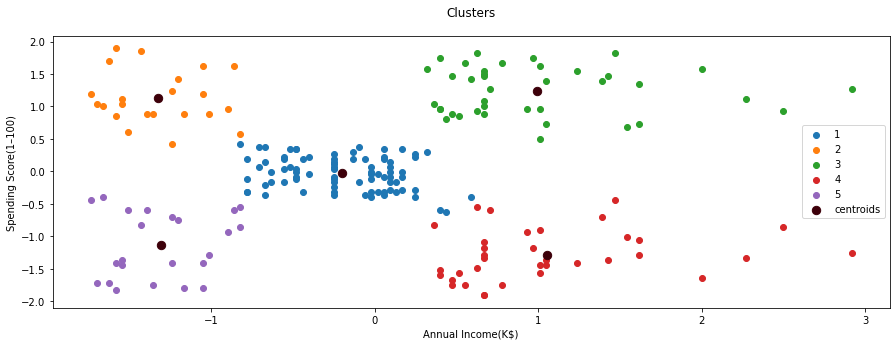

In [148]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot()

for i in range(0, 5):
    
    ax.scatter(X_sc[X['Labels'] == i, 0], X_sc[X['Labels'] == i, 1], label = i+1)
    
plt.scatter(X_centroids[:,0], X_centroids[:,1], s = 70, c = '#3d000a', label = 'centroids')
plt.title('Clusters', y = 1.05)
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1–100)')
plt.legend()

### Выводы:

Теперь явно выделились 5 кластеров:
- 1 - Люди со средним доходом и средними тратами
- 2 - Люди с небольшим доходом и высокими тратами
- 3 - люди с высоким доходом и высокими тратами
- 4 - Люди с высоким доходом, тратящие мало
- 5 - Люди с небольшим доходом, тратящие мало.

Потенциально интересный сегмент 4, этих покупателей стоит изучить более детально и разработать для них специальное предложение, чтобы перевести их в сегмент 3.